# Predicting QQQ Prices Using TFT Arquitecture

This is a Data Science Project focused on the prediction of the Crypto QQQ ETF stock, the final idea of this project is to evaluate how accurate are TFT arquitectures for time series forecasting in the stocks market. The whole project consist on, model research, model deployment and public deployment of the model via a web app plus the creation of a bot with reinforcement learning to learn how to trade.

In [2]:
#Getting the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Dataset

The dataset will be taken from the the Yfinance API, at first we will be using only metrics and indicators such as Relative Strength Indicator (RSI), MACD (Macro-Average Divergence), etc to help the current metrics that the Yfinance can give to us. If the model accuracy is not accurate enough for long term prediction the use of sentimental analysis will be used.

In [2]:
import yfinance as yf

## Ticker Data

For this case we want to get as much data as possible for the ticket data, mainly to the most amount of insights to forecast the following 5 years ahead. The interval for this model will be daily, since it give the most amount of data to get possible breakout and set tendencies.

In [11]:
ticker = "QQQ"
start_time = "1999-03-10"
end_time = "2024-11-30"
data = yf.download(ticker, start=start_time, end=end_time, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [12]:
#Getting the data of the first 10 rows
data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
1999-03-10,43.347382,43.426967,42.684172,43.400438,5232000
1999-03-11,43.559605,43.917738,42.710696,43.665718,9688600
1999-03-12,42.498486,43.426979,42.153616,43.400451,8743600
1999-03-15,43.718765,43.771822,42.365818,42.816800,6369000
1999-03-16,44.090179,44.275878,43.426970,43.904481,4905800
1999-03-17,43.771847,44.143244,43.639205,44.090187,3965000
1999-03-18,44.620766,44.647294,43.705536,43.718800,4848400
1999-03-19,43.480034,45.204379,43.453505,45.204379,7160400


In [13]:
#Searching for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6475 entries, 1999-03-10 to 2024-11-29
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, QQQ)   6475 non-null   float64
 1   (High, QQQ)    6475 non-null   float64
 2   (Low, QQQ)     6475 non-null   float64
 3   (Open, QQQ)    6475 non-null   float64
 4   (Volume, QQQ)  6475 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 303.5 KB


In [14]:
#Searching for any missing data
data.isnull().sum()

Price   Ticker
Close   QQQ       0
High    QQQ       0
Low     QQQ       0
Open    QQQ       0
Volume  QQQ       0
dtype: int64

In [15]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
count,6475.000000,6475.000000,6475.000000,6475.000000,6.475000e+03
mean,118.704342,119.635217,117.658841,118.697803,6.570943e+07
std,118.188640,118.974671,117.274169,118.168210,4.889148e+07
min,17.029100,17.428088,16.774423,16.927232,3.302000e+06
25%,36.609846,36.958728,36.210142,36.602300,3.071840e+07
50%,61.218178,61.560027,60.866827,61.268835,5.329350e+07
75%,160.370529,161.804982,159.198743,160.344871,8.671350e+07
max,513.312317,514.749945,511.585061,514.540261,6.167723e+08


# Data Visualization

Have a better understanding of the data and how it correlates visually.

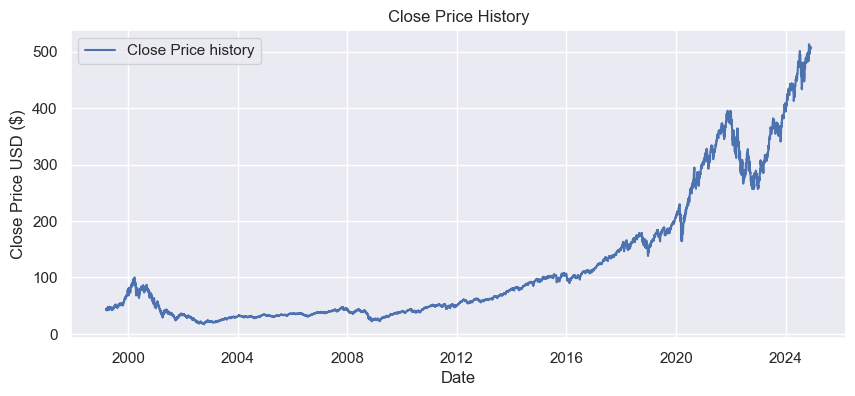

In [18]:
sns.set()
plt.figure(figsize=(10, 4))
plt.plot(data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

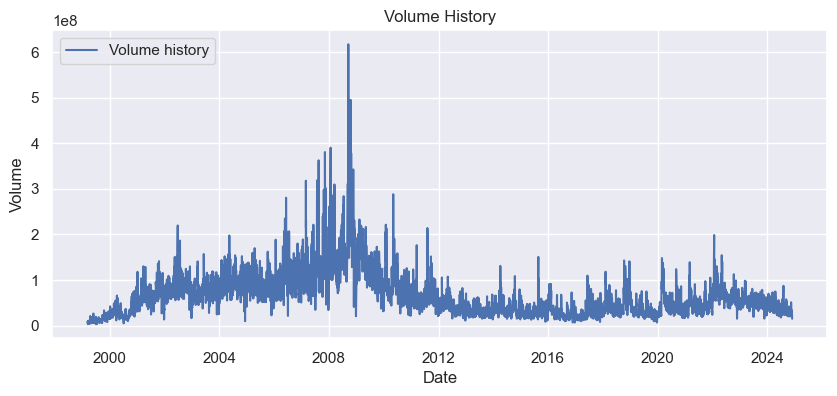

In [19]:
sns.set()
plt.figure(figsize=(10, 4))
plt.plot(data['Volume'], label='Volume history')
plt.title('Volume History')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.show()

## Volume is the amount of a security that is traded each day.

* It is a measure of the interest in a stock. If a stock is trading on low volume, then there is not much interest in the stock.
* But, on the other hand, if a stock is trading on high volume, then there is a lot of interest in the stock.

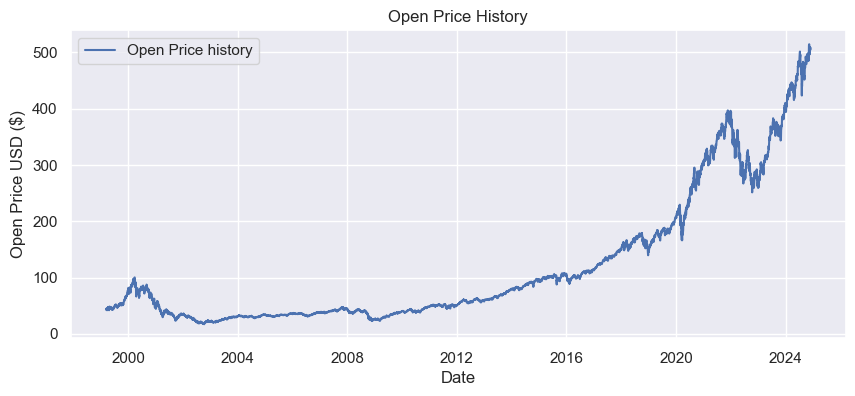

In [20]:
# Visualizing the open price history
sns.set()
plt.figure(figsize=(10, 4))
plt.plot(data['Open'], label='Open Price history')
plt.title('Open Price History')
plt.xlabel('Date')
plt.ylabel('Open Price USD ($)')
plt.legend(loc='upper left')
plt.show()

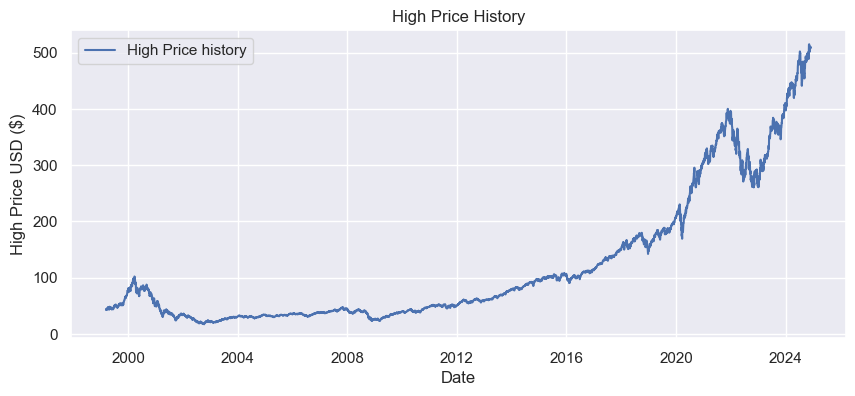

In [21]:
# Visualizing the high price history
sns.set()
plt.figure(figsize=(10, 4))
plt.plot(data['High'], label='High Price history')
plt.title('High Price History')
plt.xlabel('Date')
plt.ylabel('High Price USD ($)')
plt.legend(loc='upper left')
plt.show()

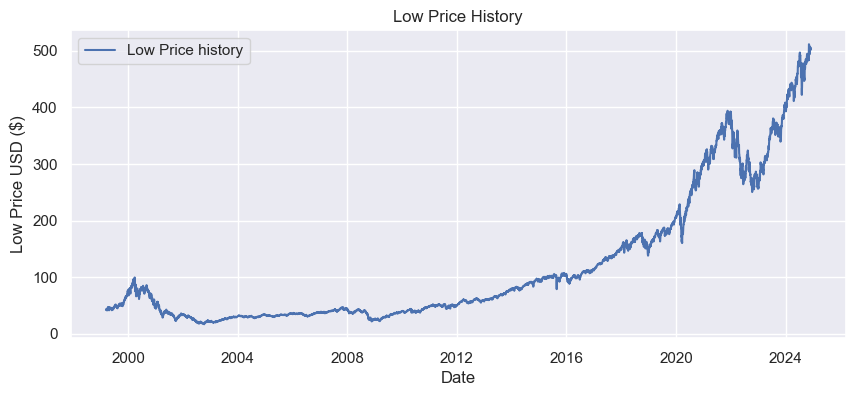

In [22]:
# Visualizing the low price history
sns.set()
plt.figure(figsize=(10, 4))
plt.plot(data['Low'], label='Low Price history')
plt.title('Low Price History')
plt.xlabel('Date')
plt.ylabel('Low Price USD ($)')
plt.legend(loc='upper left')
plt.show()

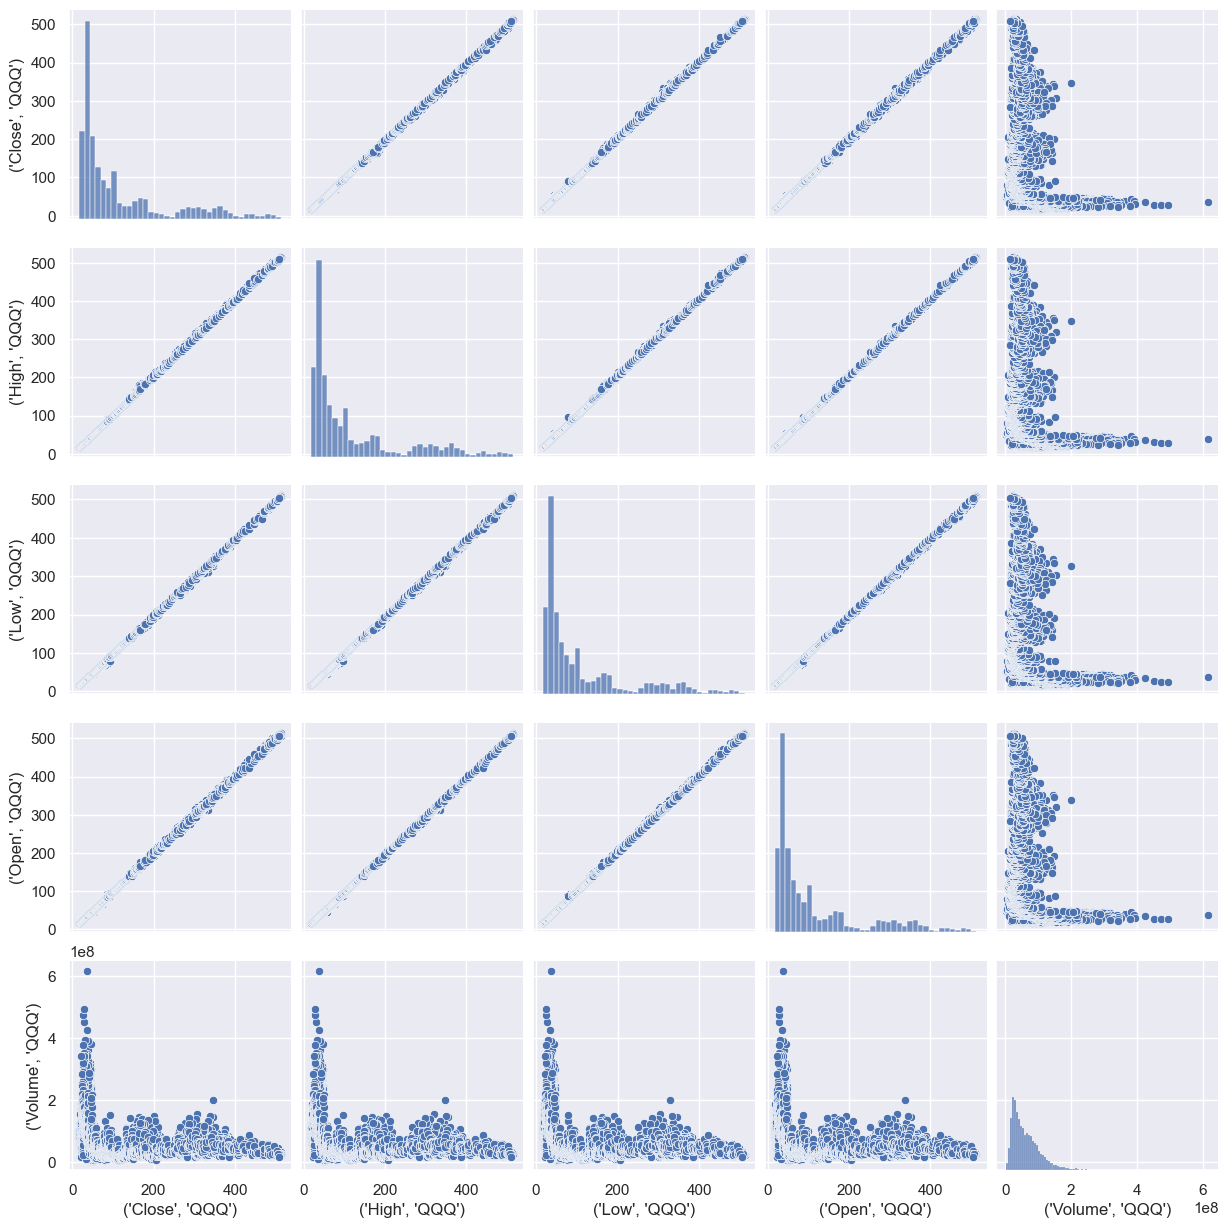

In [23]:
# Pairplot of the data
sns.pairplot(data)
plt.show()

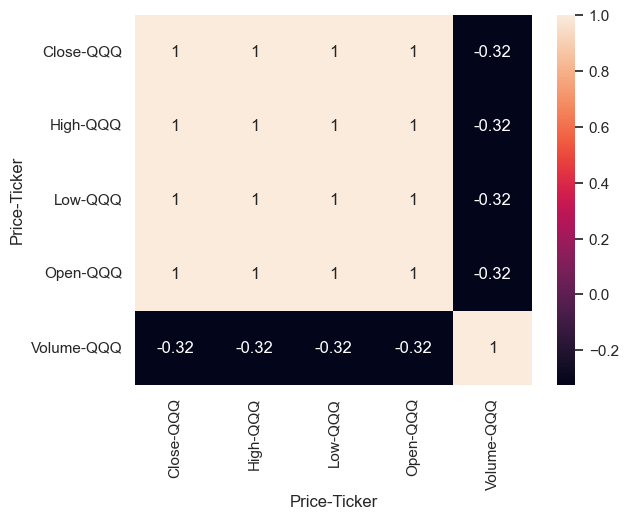

In [24]:
# Getting the correlation of the data
sns.heatmap(data.corr(), annot=True)
plt.show()